Proyecto Integrador: Expansión Estratégica de Biogenesys con Python.

Avance 1: Carga y transformación de los datos

In [42]:
##Importamos librerías.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importacion de datos desde archivo CSV.

In [ ]:
importacion = pd.read_csv(r"C:\Users\mcatvd01\Desktop\python - henry\data_latinoamerica.csv",sep= ",")

Validamos el contenido y sus dimensiones.

In [3]:
importacion.head()

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
0,AR,2020-01-01,AR,Argentina,3.0,0.0,3.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
1,AR,2020-01-02,AR,Argentina,14.0,0.0,17.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
2,AR,2020-01-03,AR,Argentina,3.0,0.0,20.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
3,AR,2020-01-04,AR,Argentina,7.0,0.0,27.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
4,AR,2020-01-05,AR,Argentina,5.0,0.0,32.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN


In [4]:
np.shape(importacion)

(12216057, 50)

Filtrado de los datos segun los países solicitados para su análisis.

In [5]:
##Primero se crea una lista que incluye las abreviaciones de los países a analizar.
paises_seleccionados = ["AR","CO","CL","BR","MX","PE"]
data_latinoamerica = importacion [importacion["location_key"].isin(paises_seleccionados)]

##Evaluamos las nuevas dimensiones del DataFrame.
np.shape(data_latinoamerica)

(5946, 50)

Segundo filtrado de los datos obtenidos según las fechas posteriores al 2021-01-01

In [6]:
data_latinoamerica = data_latinoamerica[data_latinoamerica["date"]>= "2021-01-01"]
np.shape(data_latinoamerica)


(3750, 50)

Seguimos reduciendo la DataFrame eliminando NaN.

In [7]:
data_latinoamerica = data_latinoamerica.dropna(axis=0, how="all")
data_latinoamerica = data_latinoamerica.dropna(axis=1, how="all")
np.shape(data_latinoamerica)

(3750, 50)

Validamos la cantidad de NaN por variables.

In [8]:
data_latinoamerica.isnull().sum()

location_key                                0
date                                        0
country_code                                0
country_name                                0
new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     589
population                                  0
population_male                             0
population_female                           0
population_rural                            0
population_urban                            0
population_density                          0
human_development_index                     0
population_age_00_09                        0
population_age_10_19                        0
population_age_20_29                        0
population_age_30_39                        0
population_age_40_49                        0
population_age_50_59              

Removemos variables que superen un determinado umbral por sobre el total de las filas (3750)

In [13]:
var_nulos = data_latinoamerica.isnull().sum()[data_latinoamerica.isnull().sum()>2000]
columnas_a_eliminar = var_nulos.index
print(columnas_a_eliminar)

Index(['new_recovered', 'cumulative_recovered'], dtype='object')


In [14]:
data_latinoamerica = data_latinoamerica.drop(columns= columnas_a_eliminar)
np.shape(data_latinoamerica)

(3750, 48)

Evaluamos la informacion de cada columna del DataFrame

In [15]:
for columna in data_latinoamerica.columns:
    print(columna)
    print(data_latinoamerica[columna].describe())
    print("-------------------------")

location_key
count     3750
unique       6
top         AR
freq       625
Name: location_key, dtype: object
-------------------------
date
count           3750
unique           625
top       2021-01-01
freq               6
Name: date, dtype: object
-------------------------
country_code
count     3750
unique       6
top         AR
freq       625
Name: country_code, dtype: object
-------------------------
country_name
count          3750
unique            6
top       Argentina
freq            625
Name: country_name, dtype: object
-------------------------
new_confirmed
count      3729.000000
mean      13924.598284
std       24258.010004
min        -573.000000
25%        1531.000000
50%        5164.000000
75%       14911.000000
max      298408.000000
Name: new_confirmed, dtype: float64
-------------------------
new_deceased
count     3729.000000
mean       277.300885
std        508.206954
min          0.000000
25%         26.000000
50%        100.000000
75%        314.000000
max      1144

Aplicamos un filtro sobre  el DataFrame que permita evaluar las principales metricas estadísticas.

In [ ]:
def describir_datos(data):
    for i in data_latinoamerica.columns:
        if data_latinoamerica[i].dtype=="float64" or data_latinoamerica[i].dtype=="int64":
            print(i)
            print("Mediana: ",data_latinoamerica[i].median())
            print("Varianza: ",data_latinoamerica[i].var())
            print("Maximo: ",data_latinoamerica[i].max())
            print("----------------------------------")

describir_datos(data_latinoamerica)


new_confirmed
Mediana:  5164.0
Varianza:  588451049.3519927
Maximo:  298408.0
----------------------------------
new_deceased
Mediana:  100.0
Varianza:  258274.30858559004
Maximo:  11447.0
----------------------------------
cumulative_confirmed
Mediana:  3629796.0
Varianza:  63931660739362.73
Maximo:  34568833.0
----------------------------------
cumulative_deceased
Mediana:  139621.0
Varianza:  33465929152.180298
Maximo:  685203.0
----------------------------------
cumulative_vaccine_doses_administered
Mediana:  42232104.0
Varianza:  9193811938737052.0
Maximo:  347868481.0
----------------------------------
population
Mediana:  47910798.0
Varianza:  4507476512829145.0
Maximo:  212559409.0
----------------------------------
population_male
Mediana:  22254165.0
Varianza:  1101239470229229.0
Maximo:  104435783.0
----------------------------------
population_female
Mediana:  23245825.0
Varianza:  1189150601199526.5
Maximo:  108123626.0
----------------------------------
population_rural
M

Exportamos el DataFrame una vez que conseguimos la dimension adecuada.

In [55]:
data_latinoamerica.to_csv("DatosFinalesFiltrado.csv", index=False)

Importamos nuestro nuevo archivo ya normalizado.

In [68]:
data_latam = pd.read_csv(r"C:\Users\mcatvd01\Desktop\python - henry\modulo4\DatosFinalesFiltrado.csv", sep=",")

Trabajamos con el tratamiento de los valores nulos restantes, filtrando por países.

In [ ]:
##Rellenamos valores nulos con la media de cada país.
for pais in paises_seleccionados:
    data_latam["new_confirmed"]=data_latam["new_confirmed"].fillna(0)
    data_latam["new_deceased"]=data_latam["new_deceased"].fillna(0)
    data_latam["cumulative_confirmed"]=data_latam["cumulative_confirmed"].fillna(data_latam[data_latam["location_key"]==pais]["cumulative_confirmed"].mean())
    data_latam["cumulative_deceased"]=data_latam["cumulative_deceased"].fillna(data_latam[data_latam["location_key"]==pais]["cumulative_deceased"].mean())
    data_latam["maximum_temperature_celsius"]=data_latam["maximum_temperature_celsius"].fillna(data_latam[data_latam["location_key"]==pais]["maximum_temperature_celsius"].mean())
    data_latam["average_temperature_celsius"]=data_latam["average_temperature_celsius"].fillna(data_latam[data_latam["location_key"]==pais]["average_temperature_celsius"].mean())
    data_latam["minimum_temperature_celsius"]=data_latam["minimum_temperature_celsius"].fillna(data_latam[data_latam["location_key"]==pais]["minimum_temperature_celsius"].mean())
    data_latam["rainfall_mm"]=data_latam["rainfall_mm"].fillna(data_latam[data_latam["location_key"]==pais]["rainfall_mm"].mean())
    data_latam["relative_humidity"]=data_latam["relative_humidity"].fillna(data_latam[data_latam["location_key"]==pais]["relative_humidity"].mean())
    data_latam["cumulative_vaccine_doses_administered"]=data_latam["cumulative_vaccine_doses_administered"].fillna(0)
    

In [70]:
data_latam.isnull().sum()

location_key                             0
date                                     0
country_code                             0
country_name                             0
new_confirmed                            0
new_deceased                             0
cumulative_confirmed                     0
cumulative_deceased                      0
cumulative_vaccine_doses_administered    0
population                               0
population_male                          0
population_female                        0
population_rural                         0
population_urban                         0
population_density                       0
human_development_index                  0
population_age_00_09                     0
population_age_10_19                     0
population_age_20_29                     0
population_age_30_39                     0
population_age_40_49                     0
population_age_50_59                     0
population_age_60_69                     0
population_

Mismas metricas, pero realizadas en base a la DataFrame data_latam.

In [71]:
def describir_datos(data):
    for i in data_latam.columns:
        if data_latam[i].dtype=="float64" or data_latam[i].dtype=="int64":
            print(i)
            print("Mediana: ",data_latam[i].median())
            print("Varianza: ",data_latam[i].var())
            print("Maximo: ",data_latam[i].max())
            print("Minimo: ",data_latam[i].min())
            print("----------------------------------")

describir_datos(data_latam)

new_confirmed
Mediana:  5102.0
Varianza:  586234860.8116882
Maximo:  298408.0
Minimo:  -573.0
----------------------------------
new_deceased
Mediana:  98.0
Varianza:  257255.9058042145
Maximo:  11447.0
Minimo:  0.0
----------------------------------
cumulative_confirmed
Mediana:  3643908.5
Varianza:  63576315001157.555
Maximo:  34568833.0
Minimo:  971.0
----------------------------------
cumulative_deceased
Mediana:  139478.0
Varianza:  33320973738.922688
Maximo:  685203.0
Minimo:  1.0
----------------------------------
cumulative_vaccine_doses_administered
Mediana:  32384815.0
Varianza:  8545114516992615.0
Maximo:  347868481.0
Minimo:  0.0
----------------------------------
population
Mediana:  47910798.0
Varianza:  4507476512829145.0
Maximo:  212559409.0
Minimo:  17574003.0
----------------------------------
population_male
Mediana:  22254165.0
Varianza:  1101239470229229.0
Maximo:  104435783.0
Minimo:  8972014.0
----------------------------------
population_female
Mediana:  2324582

Evaluamos el valor minimo obtenido de la columna "New_Confirmed", decidimos borrarlo al tener un valor inconcluso para el analisis. (index:888)

In [76]:
data_latam=data_latam.drop(index=888)

La DataFrame queda con una fila menos debido a la decisión anterior tomada.

In [ ]:
np.shape(data_latam)


(3749, 48)

AVANCE 2 | Análisis Exploratorio – Visualización

Importamos librerías y el dataframe.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_latam = pd.read_csv(r"C:\Users\mcatvd01\Desktop\python - henry\modulo4\DatosFinalesFiltrado.csv", sep=",")

In [3]:
data_latam.head()

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,rainfall_mm,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
0,AR,2021-01-01,AR,Argentina,2685.0,140.0,1662867.0,46522.0,18849.0,44938712.0,...,0.00000,41.559285,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
1,AR,2021-01-02,AR,Argentina,7767.0,166.0,1670634.0,46688.0,20334.0,44938712.0,...,0.00000,43.581350,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
2,AR,2021-01-03,AR,Argentina,4934.0,157.0,1675568.0,46845.0,20529.0,44938712.0,...,13.14450,74.880846,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
3,AR,2021-01-04,AR,Argentina,13953.0,157.0,1689521.0,47002.0,25164.0,44938712.0,...,1.49860,60.805923,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8
4,AR,2021-01-05,AR,Argentina,14085.0,160.0,1703606.0,47162.0,29852.0,44938712.0,...,8.28675,72.972595,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8


In [5]:
data_latam.shape

(3750, 48)

In [6]:
data_latam.columns

Index(['location_key', 'date', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_

Graficos de barras comparando nuevos casos y nuevos decesos por país.

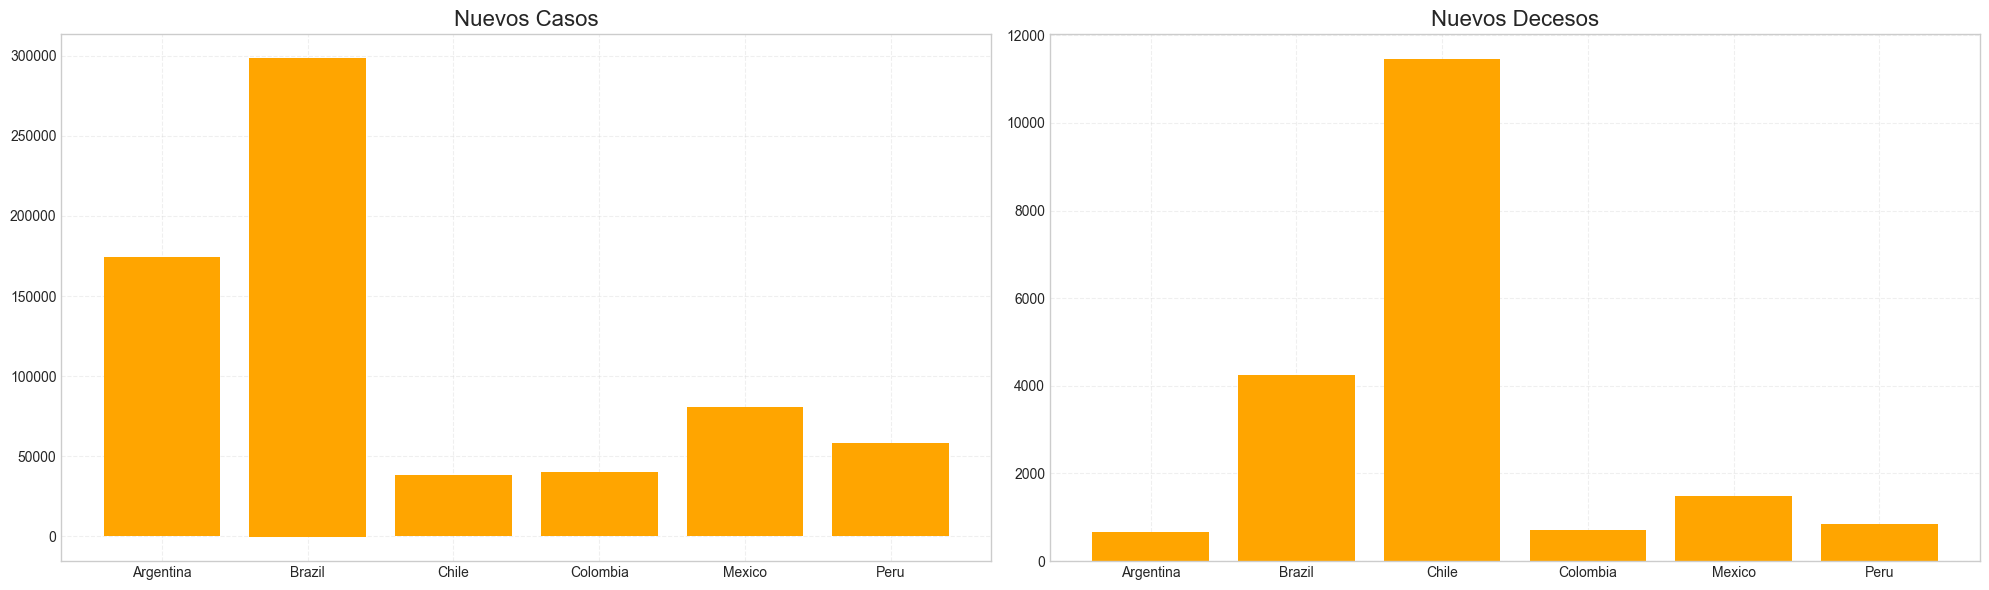

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib


# Paleta personalizada
colores_personalizados = ['#FFA500', '#FF8C00', '#D3D3D3', '#808080', '#FFFFFF']
sns.set_palette(colores_personalizados)

# Estilo general
plt.style.use('seaborn-v0_8-whitegrid')
matplotlib.rcParams['font.family'] = 'Arial'

# Variables a graficar
variables = ['new_confirmed', 'new_deceased']
titulos = ['Nuevos Casos', 'Nuevos Decesos']

# Crear figura y subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6), sharey=False)

# Generar cada gráfico estilizado
for i, var in enumerate(variables):
    barras = axs[i].bar(
        data_latam['country_name'],
        data_latam[var],
        )
    axs[i].set_title(titulos[i], fontsize=16)
    #axs[i].set_xlabel('País', fontsize=12)
    #axs[i].set_ylabel(var.replace('_', ' ').capitalize(), fontsize=12)
    axs[i].tick_params(axis='x', rotation=0)
    axs[i].grid(True, linestyle='--', alpha=0.3)
    

# Ajustar distribución
plt.tight_layout()
plt.show()


Matriz de correlación con submáscara.

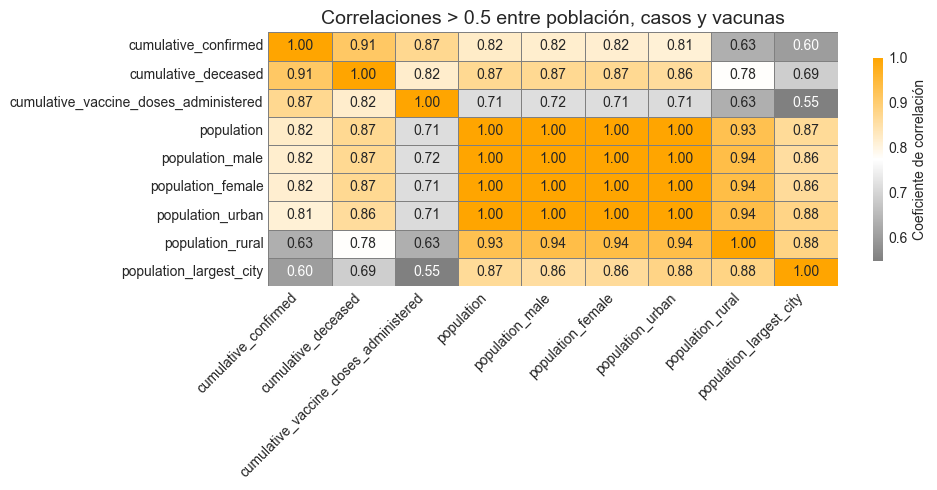

In [6]:
# Selección explícita de columnas relevantes
cols_interes = [
    'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered',
    'population', 'population_male', 'population_female',
    'population_urban', 'population_rural', 'population_largest_city'
]

# Filtrar y eliminar nulos
data_corr = data_latam[cols_interes].dropna()

# Calcular la matriz de correlación
corr = data_corr.corr()

# Crear máscara para ocultar correlaciones ≤ 0.5
mask = corr <= 0.5

# Paleta personalizada: naranjas y grises
from matplotlib.colors import LinearSegmentedColormap

# Crear paleta desde tonos gris → blanco → naranja
naranja_gris = LinearSegmentedColormap.from_list(
    "naranja_gris",
    ["#808080", "#ffffff", "#FFA500"],  # gris → blanco → naranja
    N=256
)

# Graficar el heatmap con paleta personalizada
plt.figure(figsize=(10, 5))
sns.heatmap(
    corr,
    annot=True,
    cmap=naranja_gris,
    mask=mask,
    fmt=".2f",
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={"label": "Coeficiente de correlación", "shrink": 0.8}
)

plt.title("Correlaciones > 0.5 entre población, casos y vacunas", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()





Diagrama de dispersión: temperatura vs. casos/muertes

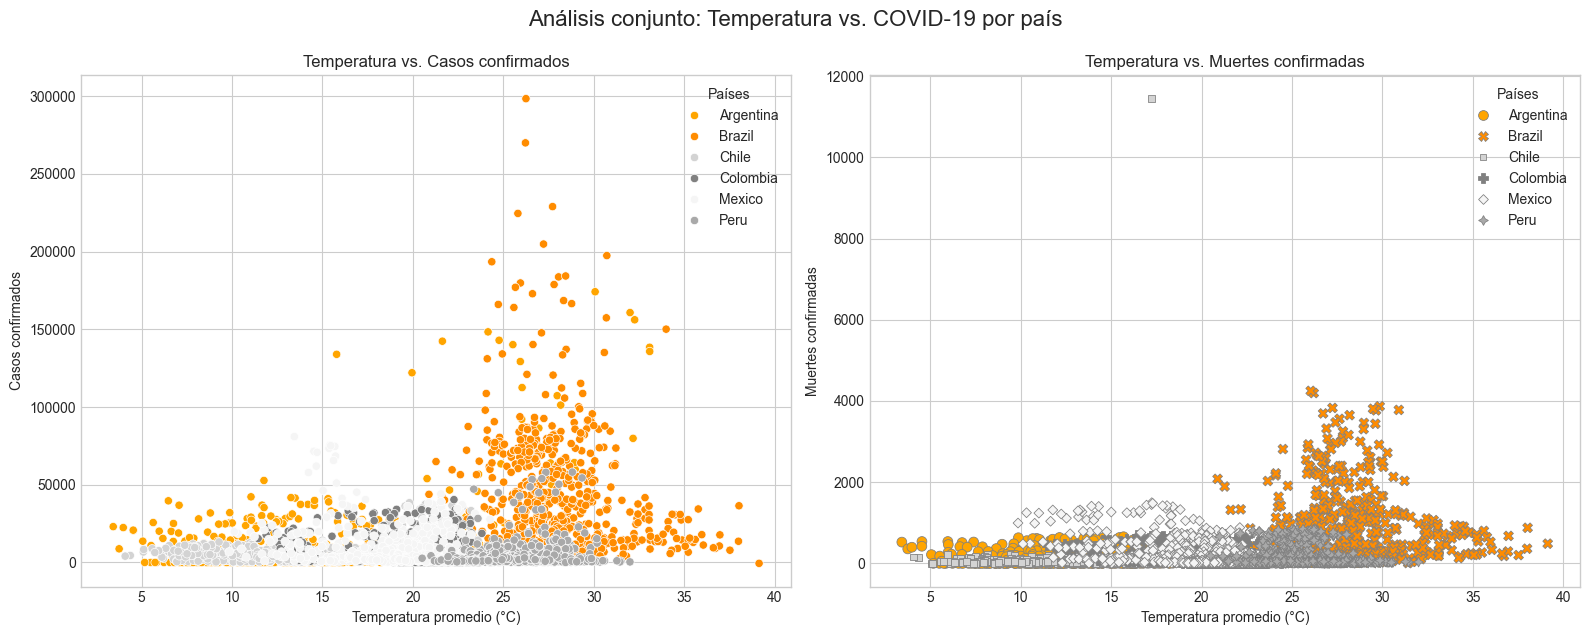

In [7]:
# Paleta personalizada (hasta 6 países)
colores_personalizados = ['#FFA500', '#FF8C00', '#D3D3D3', '#808080', '#F5F5F5', '#A9A9A9']
sns.set_palette(sns.color_palette(colores_personalizados))

# Estilo general
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'Arial'


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Primer gráfico: Temperatura vs. Casos confirmados
sns.scatterplot(
    data=data_latam,
    x='average_temperature_celsius',
    y='new_confirmed',
    hue='country_name',
    ax=axs[0],
)
axs[0].set_title('Temperatura vs. Casos confirmados')
axs[0].set_xlabel('Temperatura promedio (°C)')
axs[0].set_ylabel('Casos confirmados')

# Segundo gráfico: Temperatura vs. Muertes confirmadas
sns.scatterplot(
    data=data_latam,
    x='average_temperature_celsius',
    y='new_deceased',
    hue='country_name',
    ax=axs[1],
    style='country_name',  # diferentes formas por categoría
    s=50,  # tamaño de puntos
    edgecolor='gray'
)

axs[1].set_title('Temperatura vs. Muertes confirmadas')
axs[1].set_xlabel('Temperatura promedio (°C)')
axs[1].set_ylabel('Muertes confirmadas')
for ax in axs:
    leg = ax.get_legend()
    if leg:
        leg.set_title('Países'),

plt.tight_layout()
plt.suptitle('Análisis conjunto: Temperatura vs. COVID-19 por país', fontsize=16, y=1.05)
plt.show()


Dosis administrada (media por país).

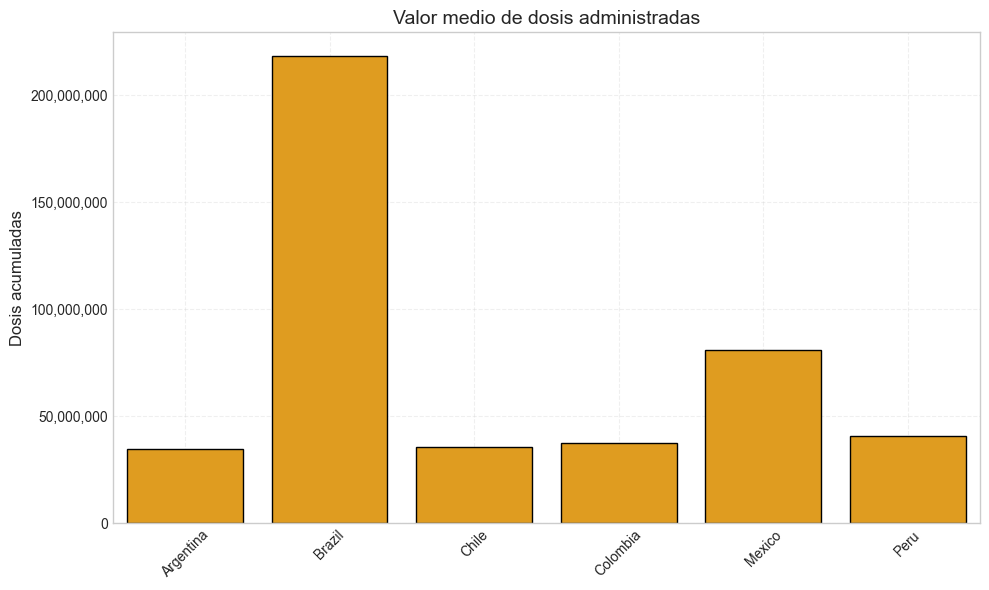

In [9]:
media_dosis = data_latam.groupby('country_name')['cumulative_vaccine_doses_administered'].mean().reset_index()

# Paleta personalizada
colores_personalizados = ['#FFA500', '#FF8C00', '#D3D3D3', '#808080', '#FFFFFF']
sns.set_palette(colores_personalizados)

# Gráfico
plt.figure(figsize=(10, 6))
sns.barplot(
    data=media_dosis,
    x='country_name',
    y='cumulative_vaccine_doses_administered',
    edgecolor='black'
)

plt.xticks(rotation=45)
plt.tick_params(axis='x', rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)

# Títulos ajustados
plt.title('Valor medio de dosis administradas', fontsize=14)
plt.ylabel('Dosis acumuladas', fontsize=12)
plt.xlabel('')  # Esto quita el título del eje X

# Formato legible en eje Y
import matplotlib.ticker as mticker

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()


Evaluacion en conjunto de nuevos casos confirmados, decesos y dosis acumuladas por país por mes.

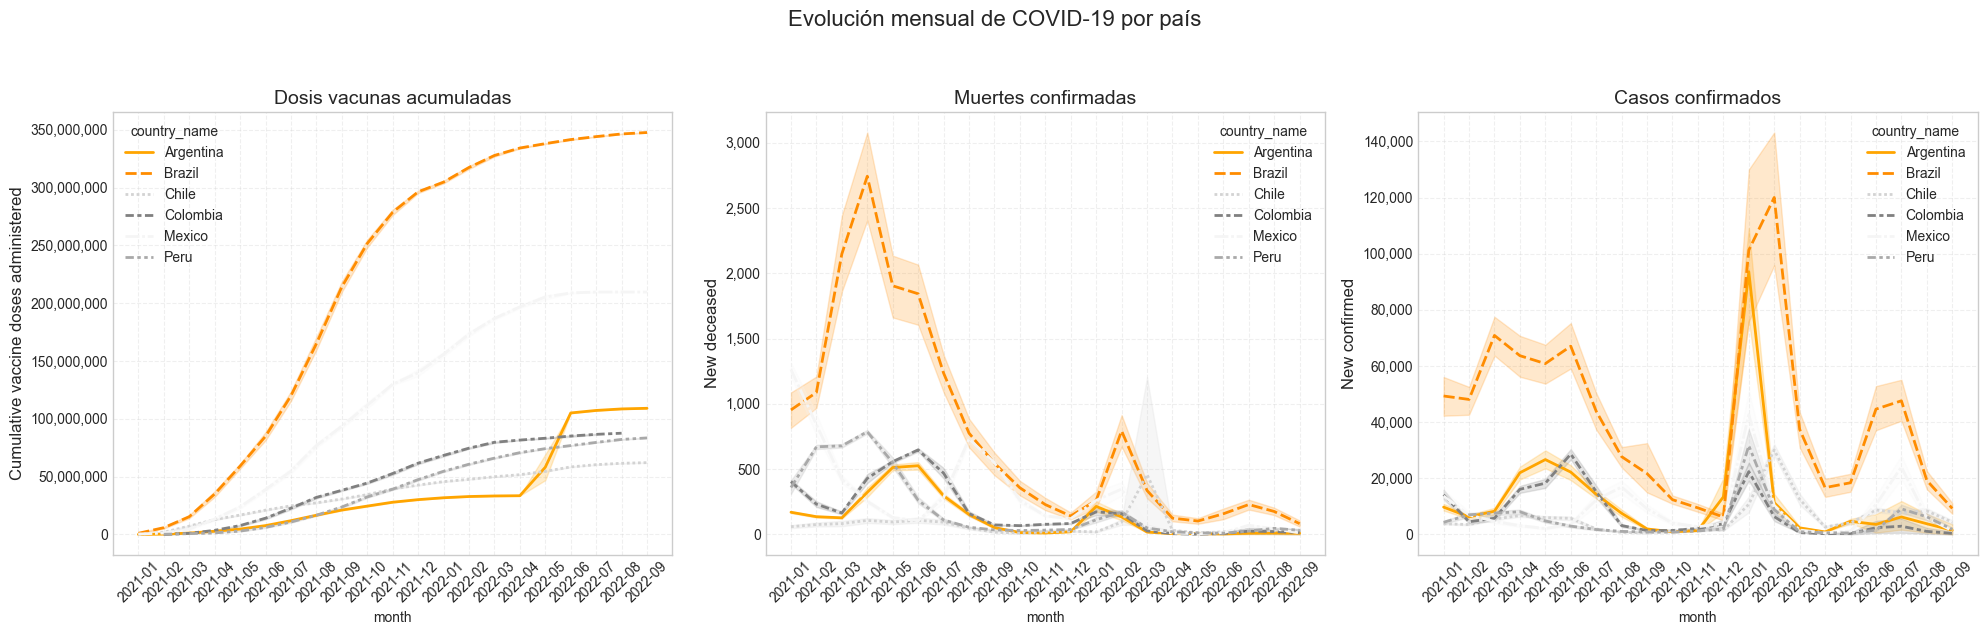

In [15]:
# Asegurarse del formato de fecha
data_latam['date'] = pd.to_datetime(data_latam['date'])
data_latam['month'] = data_latam['date'].dt.to_period('M').astype(str)
# Calcular nuevos casos mensuales por país
growth_df = data_latam.groupby(['country_name', 'month'])['new_confirmed'].sum().reset_index()

# Estilo general
plt.style.use('seaborn-v0_8-whitegrid')
matplotlib.rcParams['font.family'] = 'Arial'

# Paleta personalizada: tonos naranja, blanco y gris (hasta 6 países)
colores_personalizados = ['#FFA500', '#FF8C00', '#D3D3D3', '#808080', '#F5F5F5', '#A9A9A9']
sns.set_palette(sns.color_palette(colores_personalizados))

# Variables y títulos personalizados
variables = ['cumulative_vaccine_doses_administered', 'new_deceased', 'new_confirmed']
titulos = [
    'Dosis vacunas acumuladas',
    'Muertes confirmadas',
    'Casos confirmados'
]

# Crear figura con subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6), sharex=True)

for i, var in enumerate(variables):
    sns.lineplot(
        data=data_latam,
        x='month',
        y=var,
        hue='country_name',
        style='country_name',       # líneas con estilo único por país
        ax=axs[i],
        linewidth=2.0
    )
    axs[i].set_title(titulos[i], fontsize=14)
    axs[i].tick_params(axis='x', rotation=45)
    #axs[i].set_xlabel('Mes', fontsize=12)
    axs[i].set_ylabel(var.replace('_', ' ').capitalize(), fontsize=12)
    axs[i].grid(True, linestyle='--', alpha=0.3)
    axs[i].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))



# Título global
plt.suptitle('Evolución mensual de COVID-19 por país', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


Dosis acumulada por país.

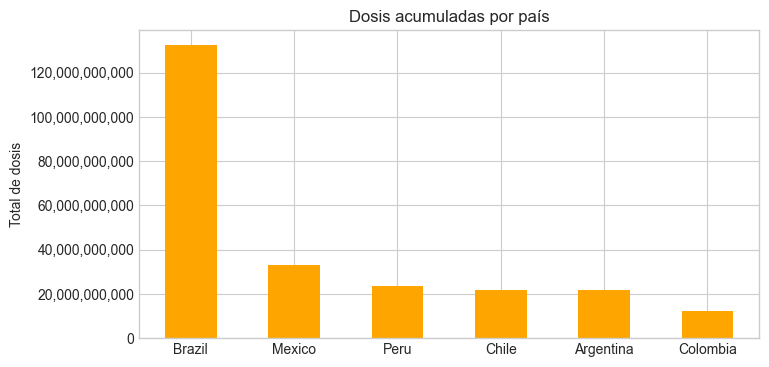

In [17]:
# Estilo general
plt.style.use('seaborn-v0_8-whitegrid')
matplotlib.rcParams['font.family'] = 'Arial'

# Paleta personalizada: tonos naranjas y grises
colores_estilo = ['#FFA500', '#FF8C00', '#D3D3D3', '#808080', '#FFFFFF']
sns.set_palette(sns.color_palette(colores_estilo))

acumulado = data_latam.groupby('country_name')['cumulative_vaccine_doses_administered'].sum().sort_values(ascending=False)
acumulado.plot(kind='bar', figsize=(8, 4))
plt.title('Dosis acumuladas por país')
plt.ylabel('Total de dosis')
plt.xlabel("")
plt.tick_params(axis='x', rotation=0)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()


Boxplot de temperatura media por país.

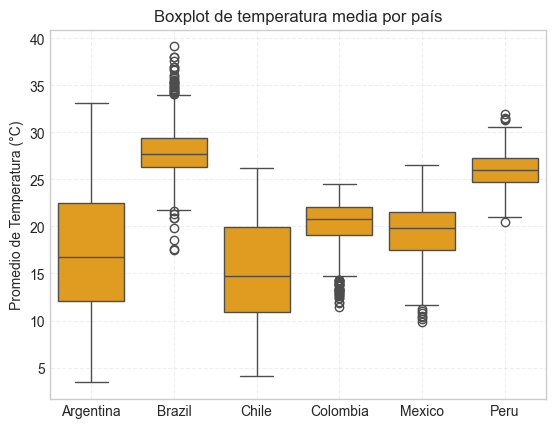

In [18]:
# Estilo general
plt.style.use('seaborn-v0_8-whitegrid')
matplotlib.rcParams['font.family'] = 'Arial'

# Paleta personalizada: tonos naranjas y grises
colores_estilo = ['#FFA500', '#FF8C00', '#D3D3D3', '#808080', '#FFFFFF']
sns.set_palette(sns.color_palette(colores_estilo))

sns.boxplot(data=data_latam, x='country_name', y='average_temperature_celsius')
plt.xticks(rotation=0)
plt.title('Boxplot de temperatura media por país')
plt.xlabel("")
plt.ylabel("Promedio de Temperatura (°C)")
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


Distribucion por grupo etario.

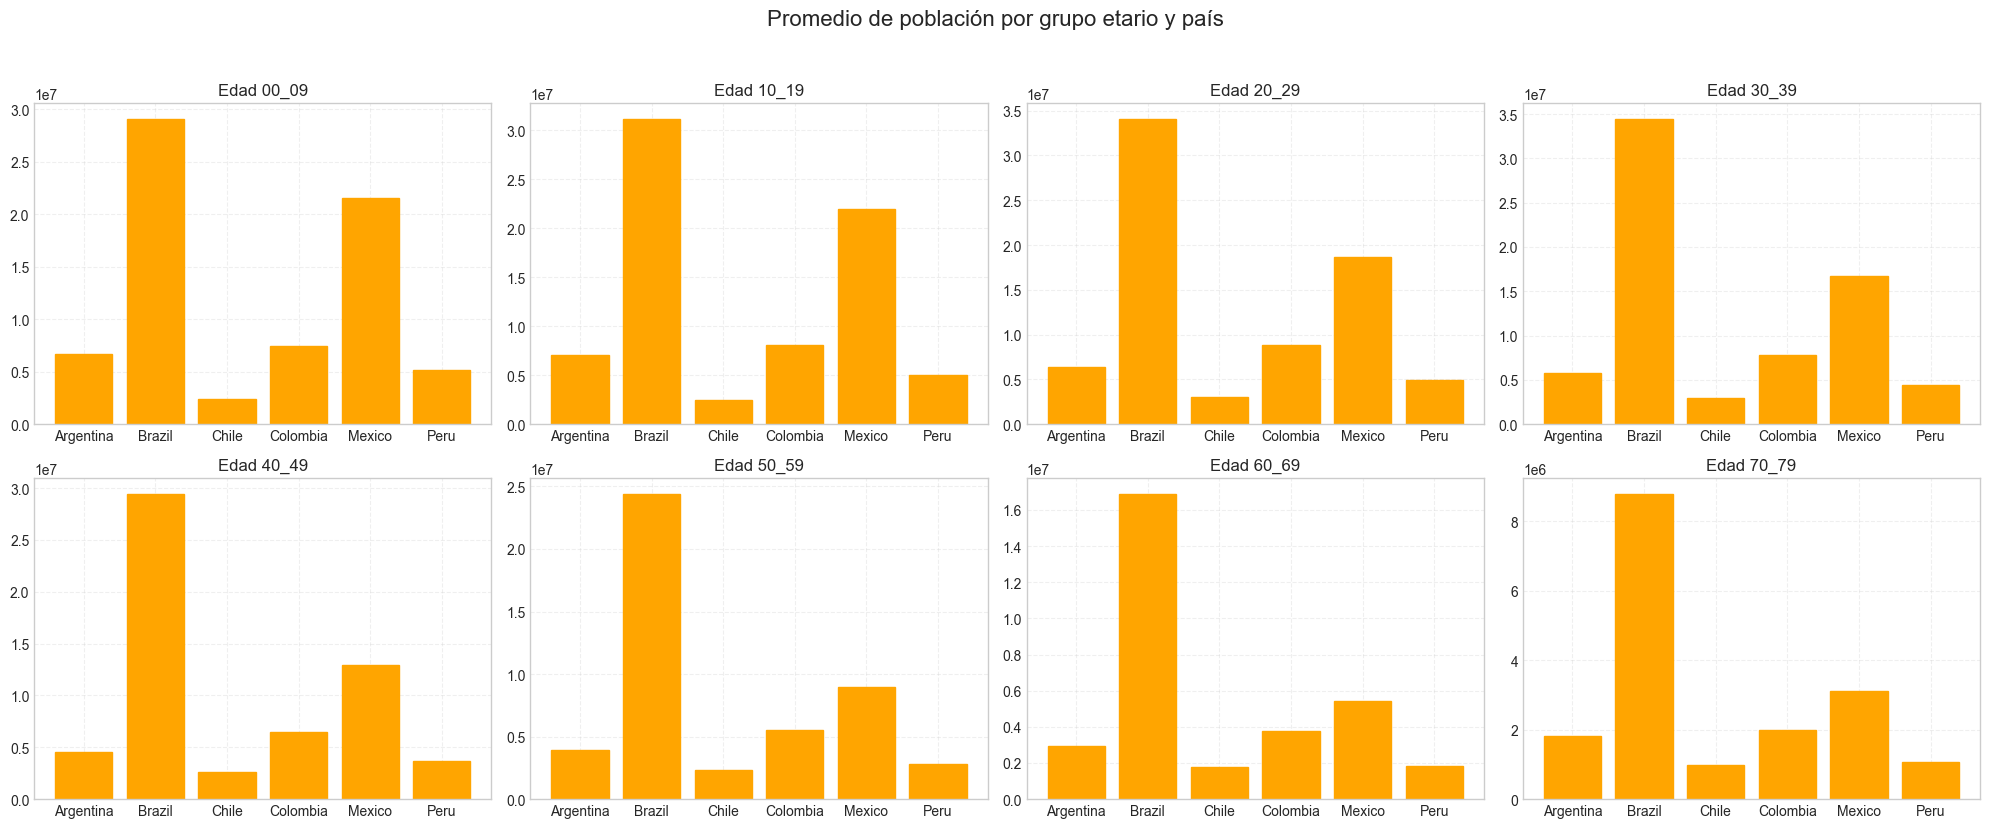

In [19]:
# Estilo general
plt.style.use('seaborn-v0_8-whitegrid')
matplotlib.rcParams['font.family'] = 'Arial'

# Paleta personalizada: tonos naranjas y grises
colores_estilo = ['#FFA500', '#FF8C00', '#D3D3D3', '#808080', '#FFFFFF']
sns.set_palette(sns.color_palette(colores_estilo))

# Definir las columnas de edad
edad_cols = [
    'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
    'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
    'population_age_60_69', 'population_age_70_79'
]

# Calcular promedio por país (agrupando si hay múltiples filas por país)
data_promedios = data_latam.groupby('country_name')[edad_cols].mean()

# Crear figura con subplots
n = len(edad_cols)
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 8))
axs = axs.flatten()

# Graficar cada grupo etario como barra
for i, col in enumerate(edad_cols):
    axs[i].bar(data_promedios.index, data_promedios[col], color='#FFA500', edgecolor='#FFA500')
    axs[i].set_title(col.replace('population_age_', 'Edad '))
    #axs[i].set_ylabel('Población promedio')
    axs[i].tick_params(axis='x', rotation=0)
    axs[i].grid(True, linestyle='--', alpha=0.3)

plt.suptitle('Promedio de población por grupo etario y país', fontsize=16, y=1.03)
plt.tight_layout()
plt.show()


Mapa de calor de métricas por país.

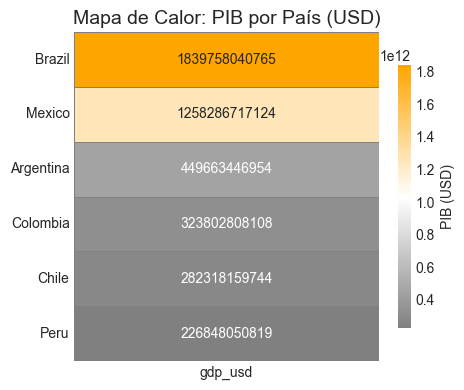

In [20]:
# Crear paleta personalizada: gris → blanco → naranja
naranja_gris = LinearSegmentedColormap.from_list(
    'naranja_gris',
    ['#808080', '#ffffff', '#FFA500'], N=256
)

# Estilo general
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'Arial'

# Preparar datos
metricas = ['gdp_usd']
heat_df = data_latam.pivot_table(index='country_name', values=metricas)
heat_df = heat_df.sort_values(by='gdp_usd', ascending=False)

# Crear gráfico
plt.figure(figsize=(5, 4))
sns.heatmap(
    heat_df,
    annot=True,
    fmt=".0f",
    cmap=naranja_gris,
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={"label": "PIB (USD)", "shrink": 0.8}
)

# Estética adicional
plt.title('Mapa de Calor: PIB por País (USD)', fontsize=14)
plt.xticks(rotation=0)
plt.xlabel(None)

plt.yticks(rotation=0)
plt.tight_layout()
#plt.xlabel("")
plt.ylabel("")
plt.show()


Barras apiladas: tasa de mortalidad por género.

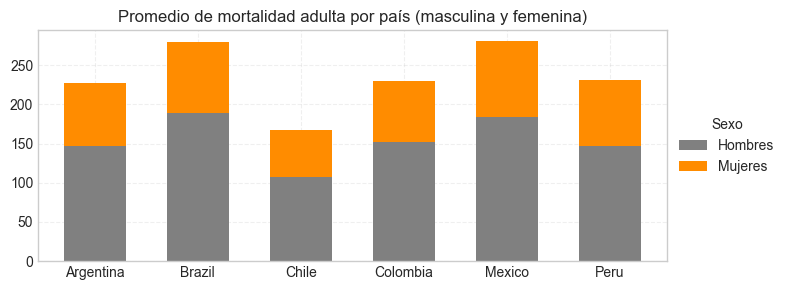

In [21]:
# Agrupar por país y calcular promedio de mortalidad adulta
mortalidad_media = data_latam.groupby('country_name')[[
    'adult_male_mortality_rate',
    'adult_female_mortality_rate'
]].mean().dropna()
# Reordenamos las columnas para que el gráfico se vea bien
mortalidad_media = mortalidad_media[['adult_male_mortality_rate', 'adult_female_mortality_rate']]

# Graficar
mortalidad_media.plot(kind='bar', stacked=True, figsize=(8, 3),
                      color=['#808080', '#FF8C00'], width=0.6)

plt.title('Promedio de mortalidad adulta por país (masculina y femenina)')
#plt.ylabel('Tasa promedio de mortalidad')
plt.xlabel('')
plt.xticks(rotation=0, ha='center')
# Ajustar espacio del subplot para dejar lugar a la leyenda
plt.subplots_adjust(right=0.40)  # reserva espacio en el lado derecho

# Leyenda posicionada dentro del figure pero fuera del área del gráfico
plt.legend(
    title='Sexo',
    labels=['Hombres', 'Mujeres'],
    loc='center left',
    bbox_to_anchor=(1.0, 0.5),
    frameon=False
)
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


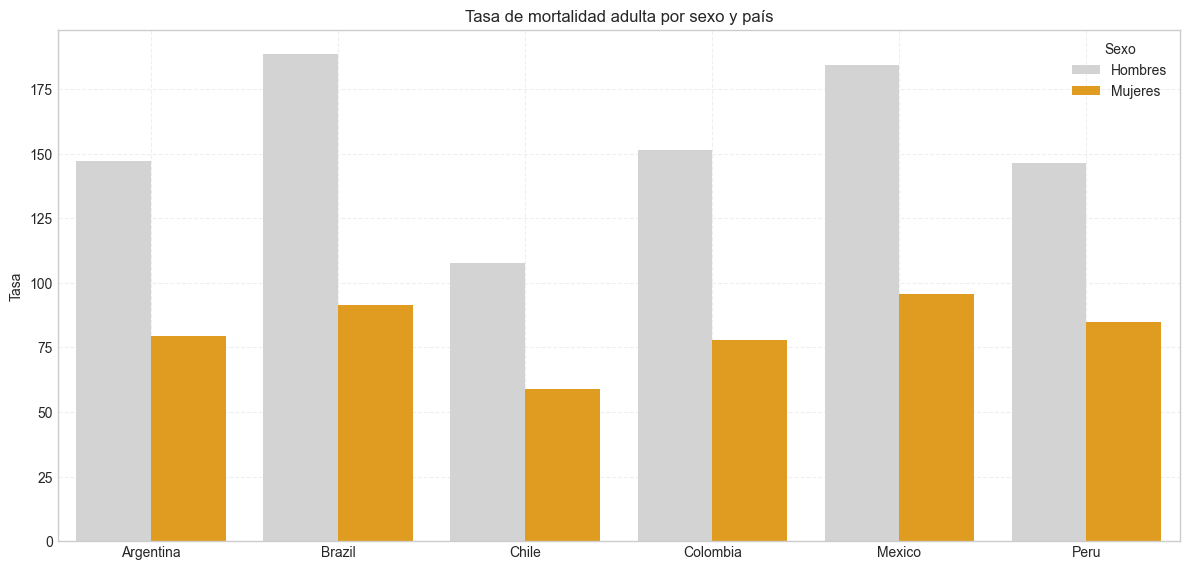

In [22]:
# Reorganizar los datos para mostrar masculino vs femenino
melted = data_latam.melt(
    id_vars='country_name',
    value_vars=['adult_male_mortality_rate', 'adult_female_mortality_rate'],
    var_name='Sexo',
    value_name='Tasa'
)

# Renombrar valores para mostrar mejor el gráfico
melted['Sexo'] = melted['Sexo'].replace({
    'adult_male_mortality_rate': 'Hombres',
    'adult_female_mortality_rate': 'Mujeres'
})

# Estilo general
plt.style.use('seaborn-v0_8-whitegrid')
matplotlib.rcParams['font.family'] = 'Arial'

# Paleta personalizada: tonos naranjas y grises
colores_estilo = ['#D3D3D3','#FFA500', '#D3D3D3','#808080', '#FFFFFF']
sns.set_palette(sns.color_palette(colores_estilo))

# Gráfico agrupado por país y sexo
plt.figure(figsize=(12, 6))
sns.barplot(data=melted, x='country_name', y='Tasa', hue='Sexo')
plt.title('Tasa de mortalidad adulta por sexo y país')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.xlabel("")
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


Matriz de correlación de indicadores demográficos y de salud.

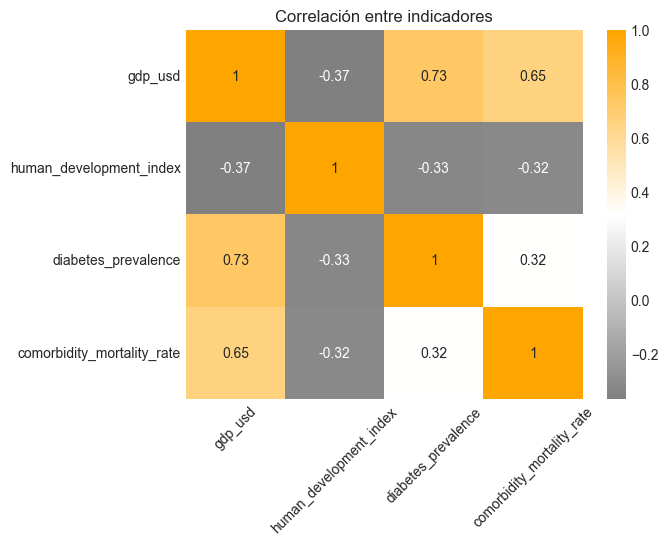

In [23]:
indicadores = ['gdp_usd', 'human_development_index', 'diabetes_prevalence', 'comorbidity_mortality_rate']
corr = data_latam[indicadores].corr()

# Crear paleta: gris → blanco → naranja
naranja_gris = LinearSegmentedColormap.from_list(
    "naranja_gris",
    ["#808080", "#ffffff", "#FFA500"],
    N=256
)
sns.heatmap(corr, annot=True, cmap=naranja_gris)
plt.title('Correlación entre indicadores')
plt.xticks(rotation=45, ha='center')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


Comparación entre la prevalencia de la diabetes y la tasa de mortalidad por comorbilidad por país.

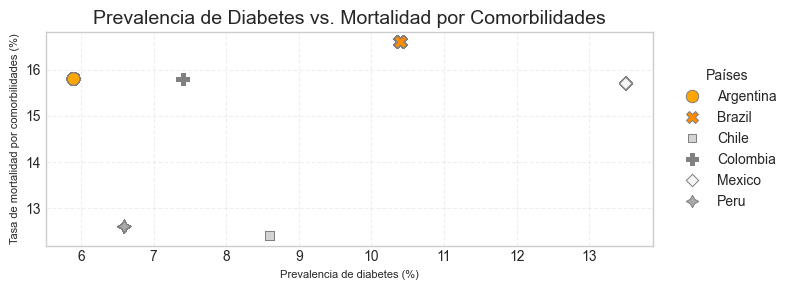

In [24]:
# Paleta personalizada (hasta 6 países)
colores_personalizados = ['#FFA500', '#FF8C00', '#D3D3D3', '#808080', '#F5F5F5', '#A9A9A9']
sns.set_palette(sns.color_palette(colores_personalizados))

# Estilo general
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'Arial'

# Gráfico de dispersión estilizado
plt.figure(figsize=(8, 3))
sns.scatterplot(
    data=data_latam,
    x='diabetes_prevalence',
    y='comorbidity_mortality_rate',
    hue='country_name',
    style='country_name',
    s=80,
    edgecolor='gray'
)

# Títulos y ejes
plt.title('Prevalencia de Diabetes vs. Mortalidad por Comorbilidades', fontsize=14)
plt.xlabel('Prevalencia de diabetes (%)', fontsize=8)
plt.ylabel('Tasa de mortalidad por comorbilidades (%)', fontsize=8)
plt.grid(True, linestyle='--', alpha=0.3)

# Ajustar espacio a la derecha para la leyenda
plt.subplots_adjust(right=0.75)

# Posicionar leyenda fuera del gráfico pero dentro del figure
plt.legend(
    title='Países',
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    frameon=False
)


plt.tight_layout()
plt.show()


AVANCE 3 | EDA con Numpy y Pandas

Seguimos sacando insights para graficas.

Evolución de Casos Activos vs. Decesos

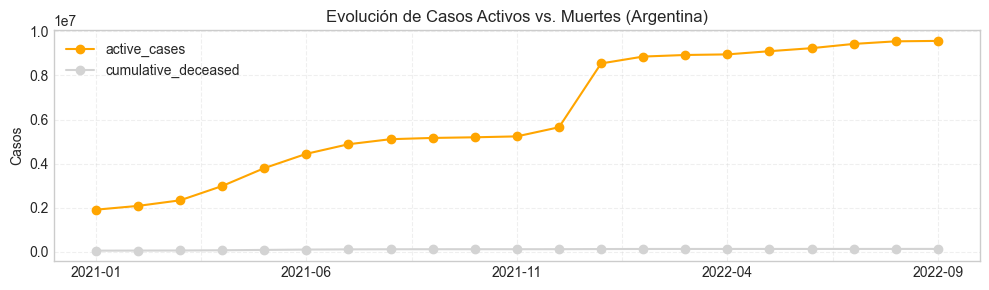

In [25]:
# Asegurarse del formato de fecha
data_latam['date'] = pd.to_datetime(data_latam['date'])
data_latam['month'] = data_latam['date'].dt.to_period('M').astype(str)

# Agrupación mensual por país (ej. Argentina)
df_ar = data_latam[data_latam['country_name'] == 'Argentina'].groupby('month').agg({
    'cumulative_confirmed': 'max',
    'cumulative_deceased': 'max',
    'cumulative_vaccine_doses_administered': 'max'
})

# Estimar activos
df_ar['active_cases'] = df_ar['cumulative_confirmed'] - df_ar['cumulative_deceased']

# Estilo general
plt.style.use('seaborn-v0_8-whitegrid')
matplotlib.rcParams['font.family'] = 'Arial'

# Paleta personalizada: tonos naranjas y grises
colores_estilo = ['#FFA500', '#D3D3D3', '#808080', '#FFFFFF']
sns.set_palette(sns.color_palette(colores_estilo))

# Gráfico
df_ar[['active_cases', 'cumulative_deceased']].plot(kind='line', figsize=(10, 3), marker='o')
plt.title('Evolución de Casos Activos vs. Muertes (Argentina)')
plt.ylabel('Casos')
plt.xlabel('')
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


Tasa de crecimiento mensual.

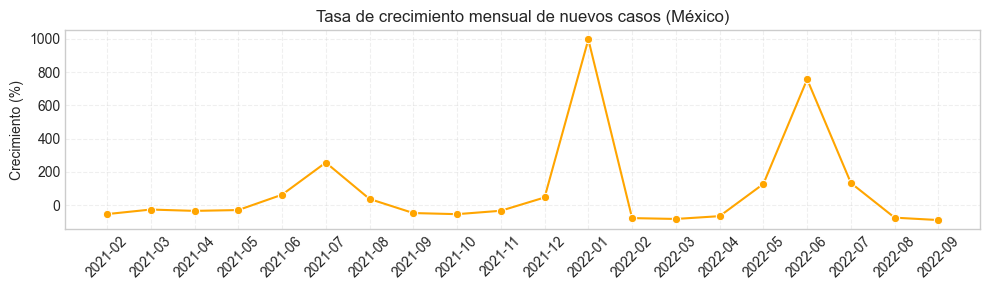

In [26]:
# Calcular nuevos casos mensuales por país
growth_df = data_latam.groupby(['country_name', 'month'])['new_confirmed'].sum().reset_index()

# Calcular crecimiento porcentual
growth_df['growth_rate'] = growth_df.groupby('country_name')['new_confirmed'].pct_change() * 100

# Estilo general
plt.style.use('seaborn-v0_8-whitegrid')
matplotlib.rcParams['font.family'] = 'Arial'

# Paleta personalizada: tonos naranjas y grises
colores_estilo = ['#FFA500', '#FF8C00', '#D3D3D3', '#808080', '#FFFFFF']
sns.set_palette(sns.color_palette(colores_estilo))

# Graficar tasa para un país (ejemplo: México)
df_mx = growth_df[growth_df['country_name'] == "Mexico"]

plt.figure(figsize=(10, 3))
sns.lineplot(data=df_mx, x='month', y='growth_rate', marker='o')
plt.title('Tasa de crecimiento mensual de nuevos casos (México)')
plt.ylabel('Crecimiento (%)')
plt.xlabel("")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


Cobertura de vacunación vs. reducción de casos.

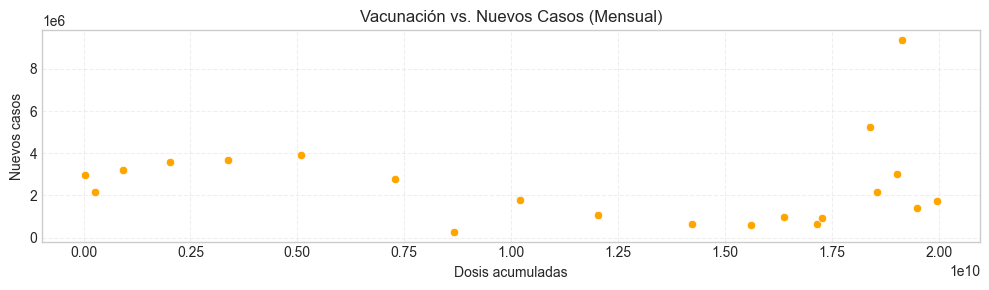

In [27]:
# Estilo general
plt.style.use('seaborn-v0_8-whitegrid')
matplotlib.rcParams['font.family'] = 'Arial'

# Paleta personalizada: tonos naranjas y grises
colores_estilo = ['#FFA500', '#FF8C00', '#D3D3D3', '#808080', '#FFFFFF']
sns.set_palette(sns.color_palette(colores_estilo))

# Agrupar por país y mes
vac_df = data_latam.groupby('month').agg({
    'cumulative_vaccine_doses_administered': 'sum',
    'new_confirmed': 'sum'
}).reset_index()

plt.figure(figsize=(10, 3))
sns.scatterplot(data=vac_df, x='cumulative_vaccine_doses_administered', y='new_confirmed')
plt.title('Vacunación vs. Nuevos Casos (Mensual)')
plt.xlabel('Dosis acumuladas')
plt.ylabel('Nuevos casos')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


Nuevos casos y temperatura promedio

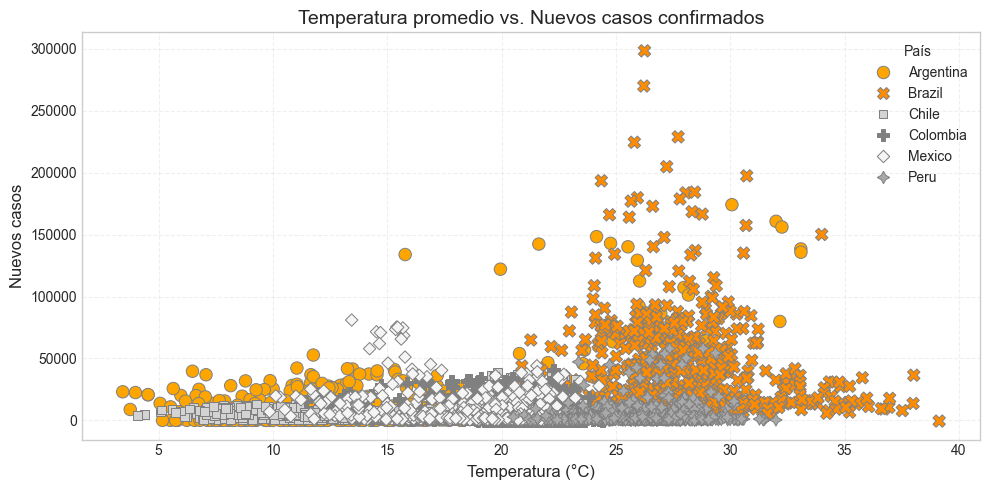

In [28]:
# Paleta personalizada en tonos naranja, blanco y gris (hasta 6 países)
colores_personalizados = ['#FFA500', '#FF8C00', '#D3D3D3', '#808080', '#F5F5F5', '#A9A9A9']
sns.set_palette(sns.color_palette(colores_personalizados))

# Estilo general
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'Arial'

# Gráfico de dispersión estilizado
plt.figure(figsize=(10, 5))
sns.scatterplot(
    data=data_latam,
    x='average_temperature_celsius',
    y='new_confirmed',
    hue='country_name',
    style='country_name',     # Diferentes símbolos por país
    s=80,                     # Tamaño de puntos
    edgecolor='gray'          # Borde suave
)

# Títulos y ejes
plt.title('Temperatura promedio vs. Nuevos casos confirmados', fontsize=14)
plt.xlabel('Temperatura (°C)', fontsize=12)
plt.ylabel('Nuevos casos', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.legend(title='País')
plt.show()


Urbanización y propagación del COVID

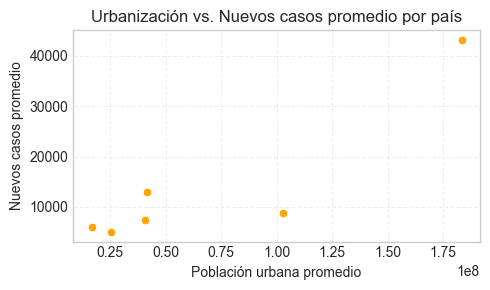

In [29]:
# Estilo general
plt.style.use('seaborn-v0_8-whitegrid')
matplotlib.rcParams['font.family'] = 'Arial'

# Paleta personalizada: tonos naranjas y grises
colores_estilo = ['#FFA500', '#FF8C00', '#D3D3D3', '#808080', '#FFFFFF']
sns.set_palette(sns.color_palette(colores_estilo))

urban_df = data_latam.groupby('country_name').agg({
    'population_urban': 'mean',
    'new_confirmed': 'mean'
}).dropna()

plt.figure(figsize=(5, 3))
sns.scatterplot(data=urban_df, x='population_urban', y='new_confirmed')
plt.title('Urbanización vs. Nuevos casos promedio por país')
plt.xlabel('Población urbana promedio')
plt.ylabel('Nuevos casos promedio')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


Distribución de población por edad por país.

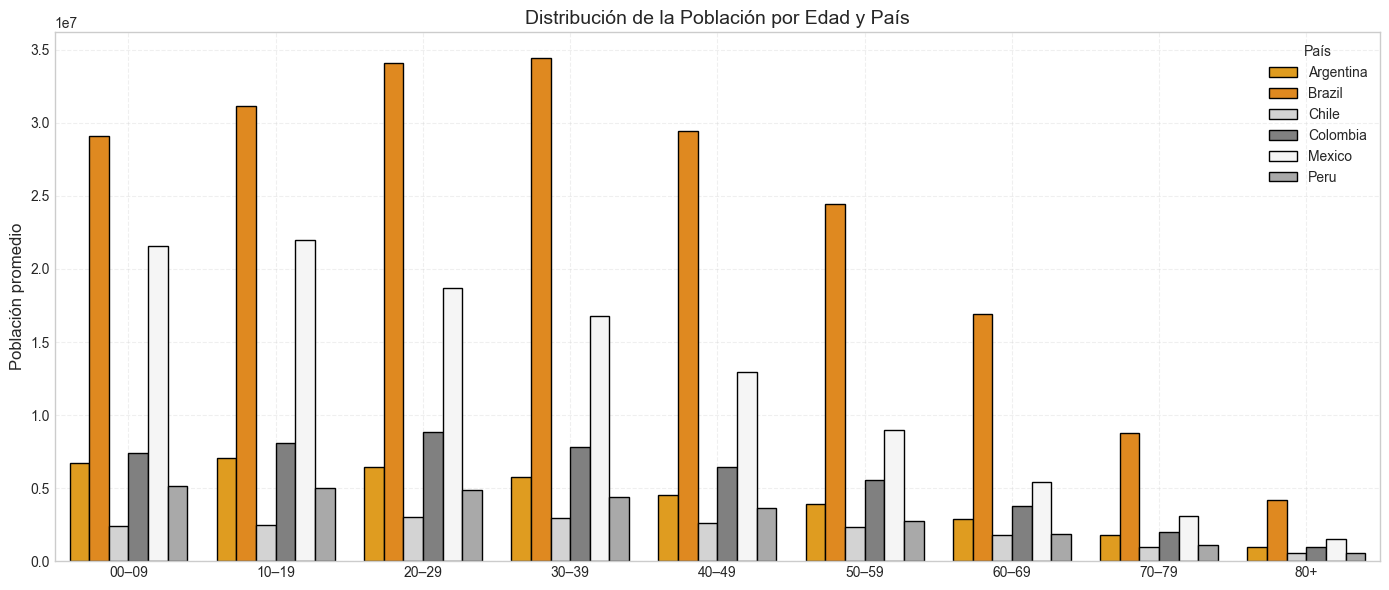

In [36]:
# Lista de columnas de población por grupo etario
columnas_edades = [
    'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
    'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
    'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older'
]

# Transformar el DataFrame a formato largo
df_melted = pd.melt(
    data_latam,
    id_vars=['country_name'],  # Otras columnas pueden sumarse si necesitás más contexto
    value_vars=columnas_edades,
    var_name='Grupo Etario',
    value_name='Población'
)

# Limpiar y formatear etiquetas
df_melted['Grupo Etario'] = (
    df_melted['Grupo Etario']
    .str.replace('population_age_', '', regex=False)
    .str.replace('_and_older', '+', regex=False)
    .str.replace('_', '–')  # Reemplaza guiones bajos por guiones
)

# Paleta definida: hasta 6 países
colores_personalizados = ['#FFA500', '#FF8C00', '#D3D3D3', '#808080', '#F5F5F5', '#A9A9A9']
sns.set_palette(sns.color_palette(colores_personalizados))

# Crear gráfico
plt.figure(figsize=(14, 6))
sns.barplot(
    data=df_melted,
    x='Grupo Etario',
    y='Población',
    hue='country_name',
    edgecolor='black'
)

# Títulos y etiquetas
plt.title('Distribución de la Población por Edad y País', fontsize=14)
plt.xlabel(None)
plt.ylabel('Población promedio', fontsize=12)
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.3)

# Estética global
plt.tight_layout()
plt.legend(title='País')
plt.show()

Condiciones preexistentes vs. mortalidad.

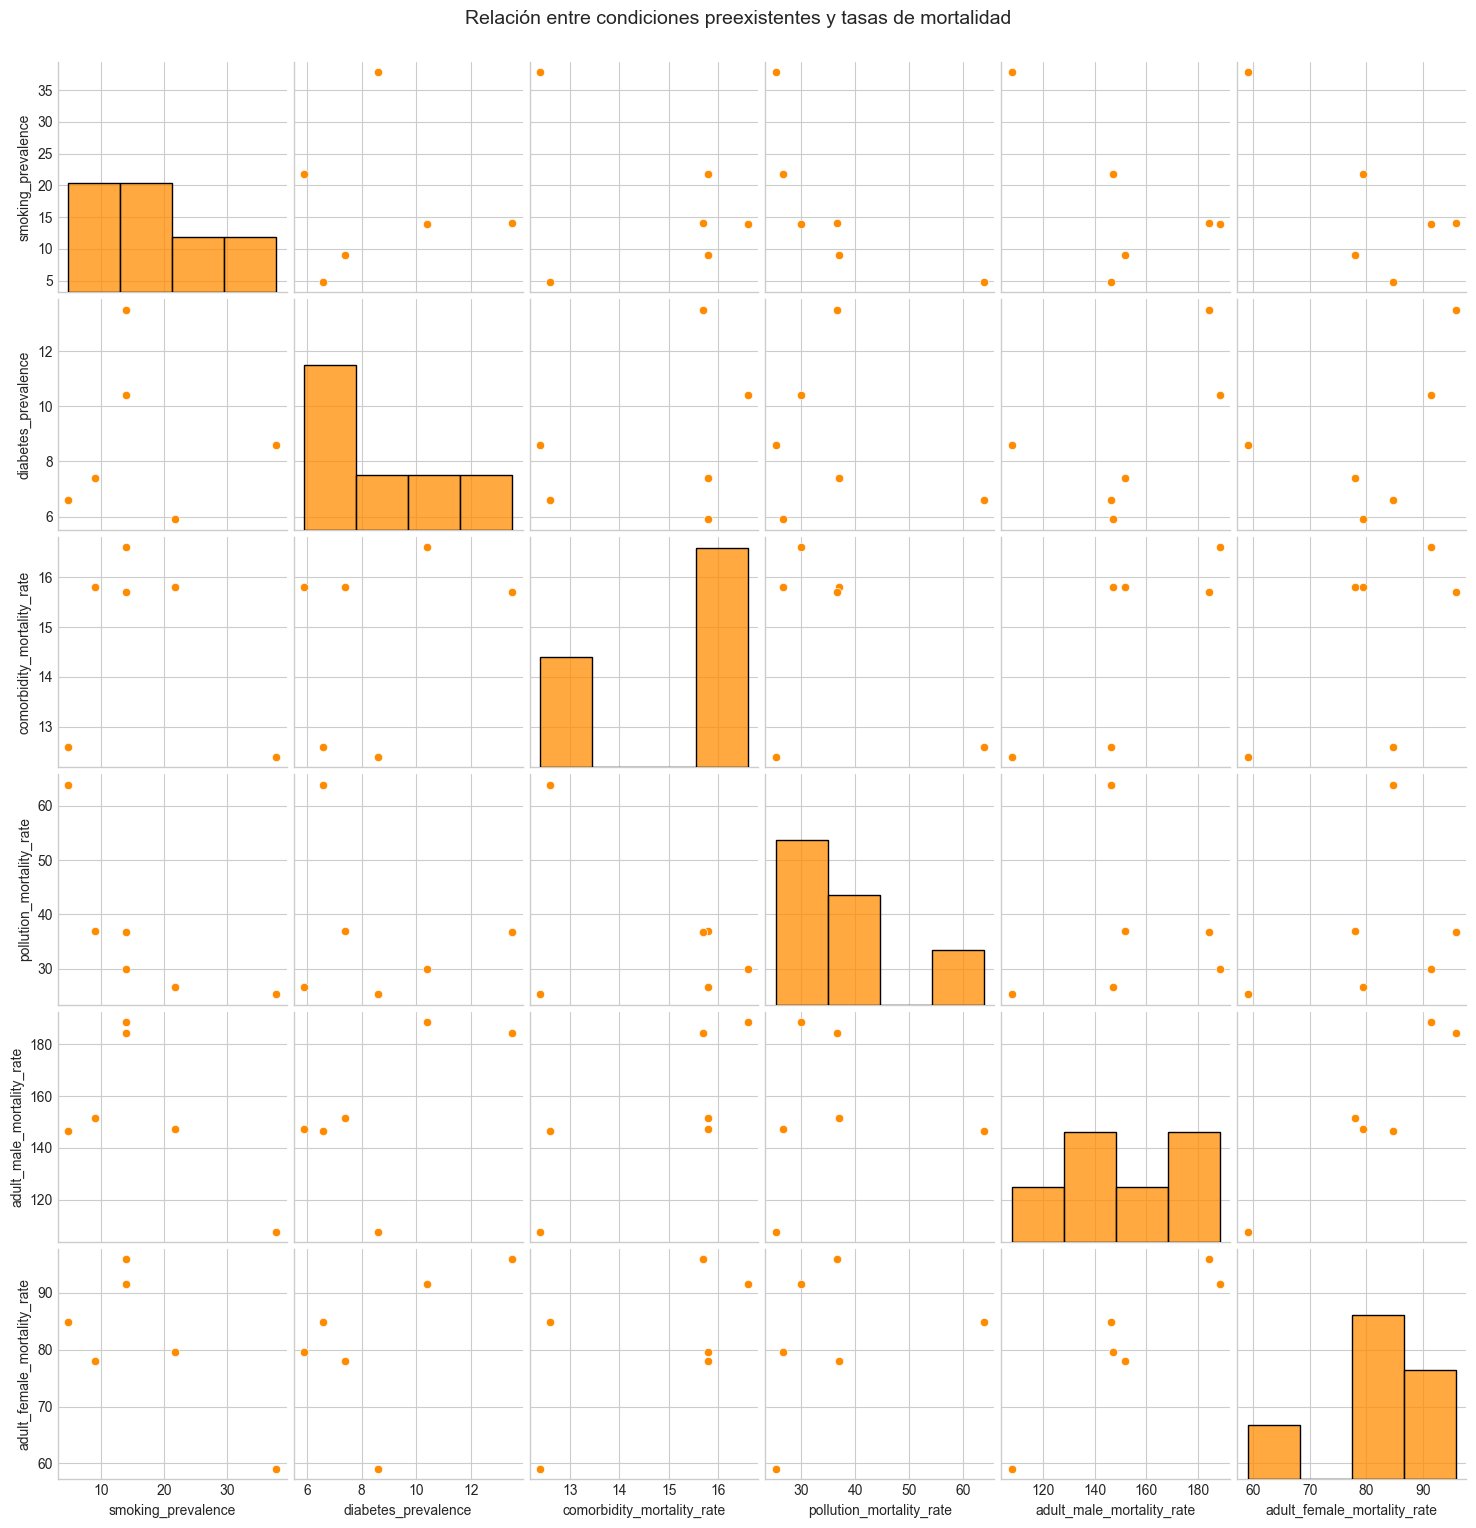

In [37]:
# Estilo general
plt.style.use('seaborn-v0_8-whitegrid')
matplotlib.rcParams['font.family'] = 'Arial'

# Paleta personalizada: tonos naranjas y grises
colores_estilo = ['#FF8C00', '#D3D3D3', '#808080', '#FFFFFF']
sns.set_palette(sns.color_palette(colores_estilo))

condiciones = ['smoking_prevalence', 'diabetes_prevalence', 'comorbidity_mortality_rate', 'pollution_mortality_rate']
df_cond = data_latam.groupby('country_name')[condiciones + ['adult_male_mortality_rate', 'adult_female_mortality_rate']].mean().dropna()

sns.pairplot(df_cond)
plt.grid(True, linestyle='--', alpha=0.3)
plt.suptitle("Relación entre condiciones preexistentes y tasas de mortalidad", fontsize=14, y=1.02)
plt.show()


Otras Correlaciones entre variables clave.

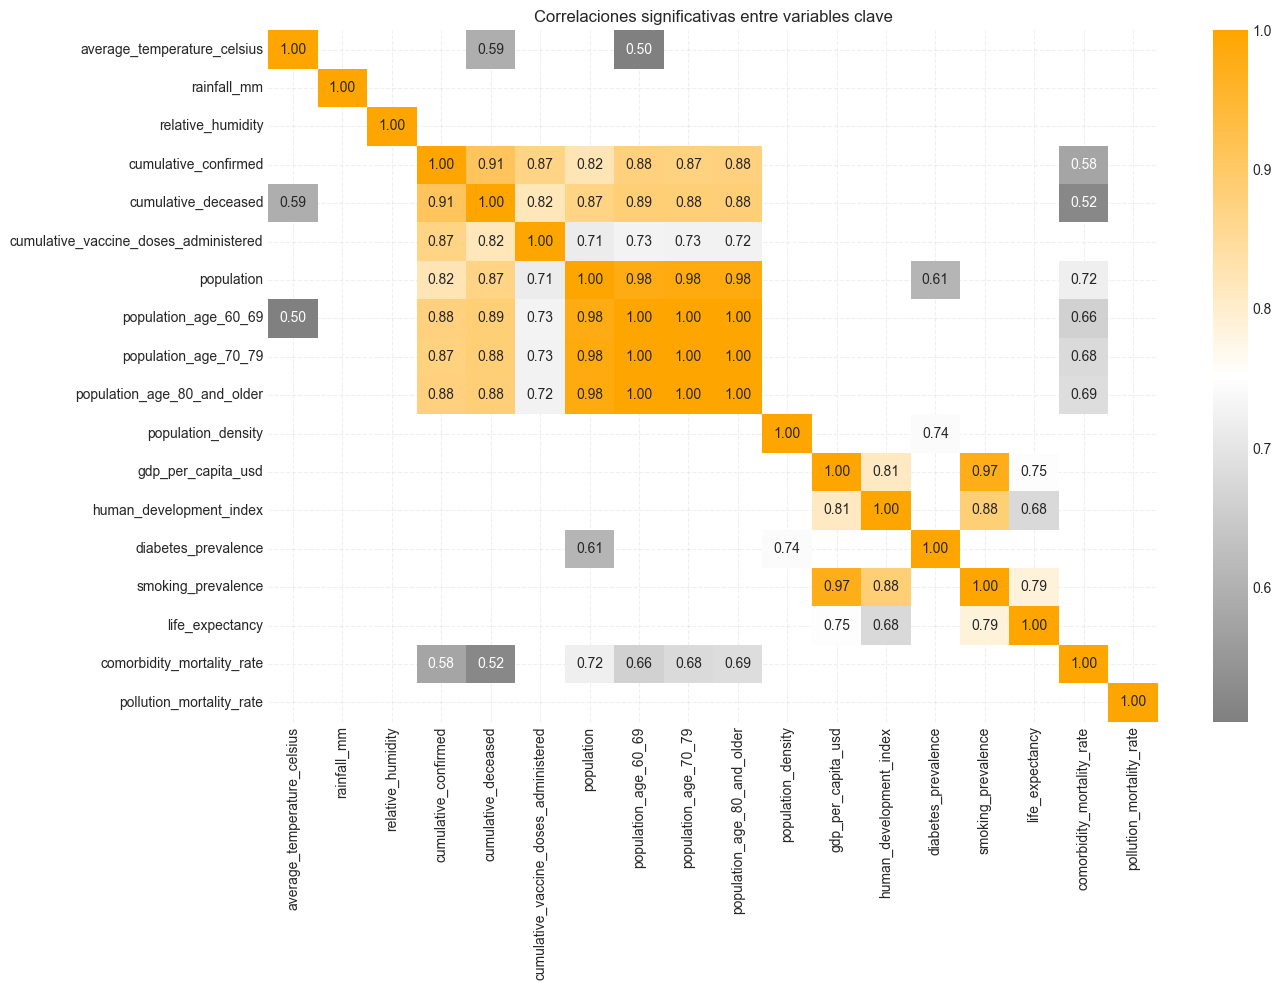

In [38]:
variables_corr = [
    'average_temperature_celsius', 'rainfall_mm', 'relative_humidity',
    'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered',
    'population', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older',
    'population_density', 'gdp_per_capita_usd', 'human_development_index',
    'diabetes_prevalence', 'smoking_prevalence', 'life_expectancy',
    'comorbidity_mortality_rate', 'pollution_mortality_rate'
]

df_corr = data_latam[variables_corr].dropna()
corr = df_corr.corr()
mask = corr <= 0.5

# Crear paleta: gris → blanco → naranja
naranja_gris = LinearSegmentedColormap.from_list(
    "naranja_gris",
    ["#808080", "#ffffff", "#FFA500"],
    N=256
)

plt.figure(figsize=(14, 10))
plt.grid(True, linestyle='--', alpha=0.3)
sns.heatmap(corr, annot=True, cmap=naranja_gris, mask=mask, fmt=".2f")
plt.title("Correlaciones significativas entre variables clave")
plt.tight_layout()
plt.show()


Vacunación vs. Nuevos Casos

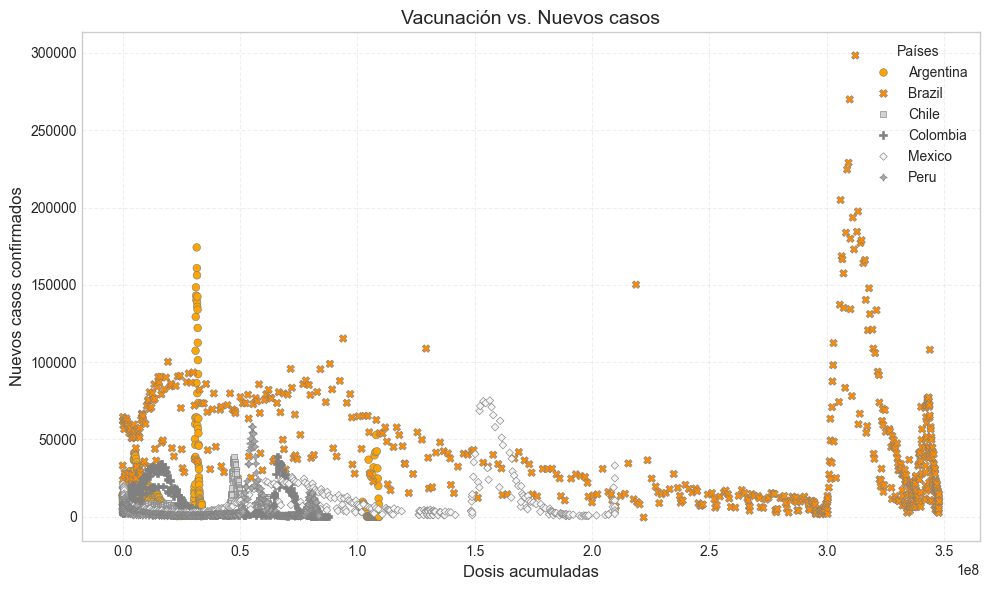

In [39]:
# Paleta personalizada para países (hasta 6)
colores_personalizados = ['#FFA500', '#FF8C00', '#D3D3D3', '#808080', '#F5F5F5', '#A9A9A9']
sns.set_palette(sns.color_palette(colores_personalizados))

# Estilo general
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'Arial'

# Crear figura
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data_latam,
    x='cumulative_vaccine_doses_administered',
    y='new_confirmed',
    hue='country_name',
    style='country_name',   # Diferentes formas por país
    s=30,                   # Tamaño consistente
    edgecolor='gray'        # Bordes suaves
)

# Títulos y estética
plt.title('Vacunación vs. Nuevos casos', fontsize=14)
plt.xlabel('Dosis acumuladas', fontsize=12)
plt.ylabel('Nuevos casos confirmados', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(title='Países')
plt.tight_layout()
plt.show()


Mapa

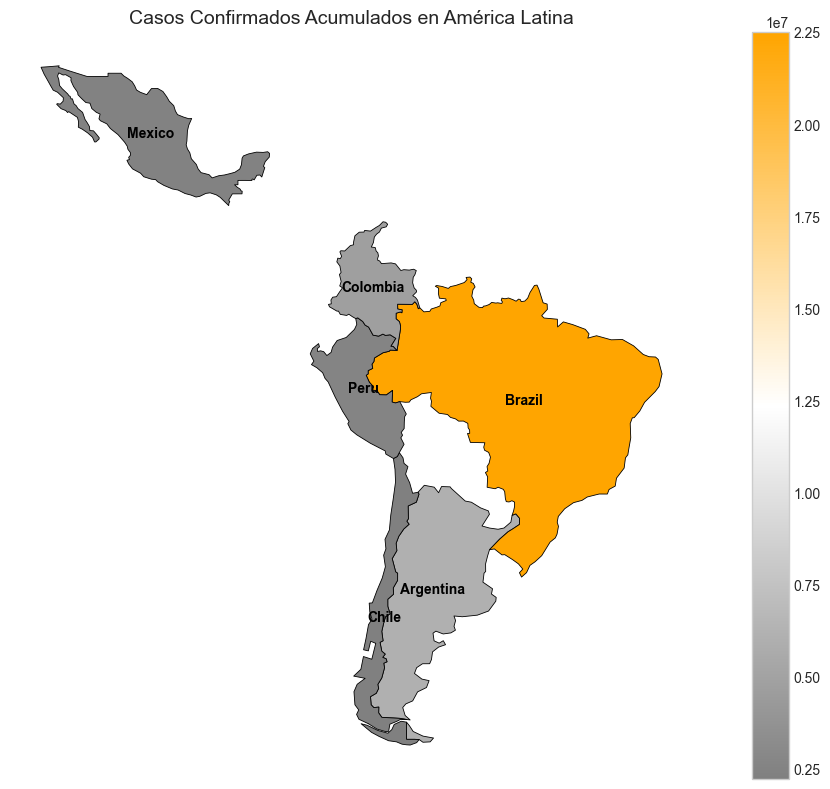

In [40]:
import geopandas as gpd
import geodatasets
import pandas as pd
import matplotlib.pyplot as plt

# Lista de países seleccionados
paises = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru']

# Filtrar tu DataFrame
df_filtered = data_latam[data_latam['country_name'].isin(paises)][[
    'country_name', 'cumulative_confirmed', 'cumulative_deceased', 'life_expectancy'
]]

# Agrupar en caso de que haya múltiples registros por país
df_grouped = df_filtered.groupby('country_name', as_index=False).mean()

# Cargar geometría de países desde geodatasets
world = gpd.read_file(r"C:\Users\mcatvd01\Desktop\Henry\ne_110m_admin_0_countries\ne_110m_admin_0_countries.shp")

# Verificar el nombre correcto de la columna de países
world.rename(columns={'NAME': 'country_name'}, inplace=True)

# Filtrar solo los países de interés
latin = world[world['country_name'].isin(paises)]

# Unir geometría con datos COVID
mapa = latin.merge(df_grouped, on='country_name')

# Crear paleta: gris → blanco → naranja
naranja_gris = LinearSegmentedColormap.from_list(
    "naranja_gris",
    ["#808080", "#ffffff", "#FFA500"],
    N=256
)

# Graficar mapa con casos confirmados
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
mapa.plot(
    column='cumulative_confirmed',
    cmap=naranja_gris,
    legend=True,
    edgecolor='black',
    linewidth=0.6,
    ax=ax
)
# Añadir nombres de países sobre el mapa
for idx, row in mapa.iterrows():
    # Extraer coordenadas del centro geométrico
    x, y = row.geometry.centroid.x, row.geometry.centroid.y
    ax.text(
        x, y,
        row['country_name'],
        ha='center',
        va='center',
        fontsize=10,
        color='black',
        weight='bold'
    )


# Título y estética
ax.set_title('Casos Confirmados Acumulados en América Latina', fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.show()


AVANCE 4| Aplicaciones Prácticas - Integración en Power BI